7-
پیش پردازش داده ها

In [141]:
import pandas as pd
import re

df = pd.read_csv('dataset.csv')

def clean_and_lower(text):
    if isinstance(text, str):
        # Remove non-alphanumeric characters and convert to lowercase
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
        return cleaned_text.strip()  # Remove leading and trailing whitespace
    else:
        return text

df = df.applymap(clean_and_lower)
df.dropna(inplace=True)

df.to_csv('cleaned_dataset.csv', index=False)
print(f"Cleaned data saved to cleaned_file.csv")


Cleaned data saved to cleaned_file.csv


8-
نمودار ستونی فراوانی

Top 30 words saved to top_30_words.csv


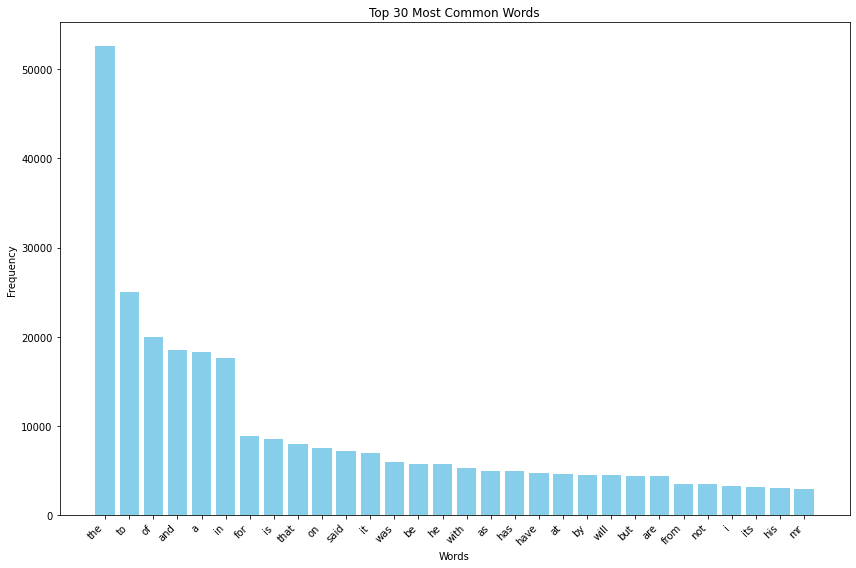

In [142]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Load the cleaned dataset from CSV (assuming you have already cleaned and saved it)
cleaned_file_path = 'cleaned_dataset.csv'
df = pd.read_csv(cleaned_file_path)

# Function to tokenize text and count word frequencies
def count_words(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words using regex
    return Counter(words)

# Combine all text columns into a single string (assuming your DataFrame has text data)
combined_text = ' '.join(df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1))

# Get word frequencies
word_counts = count_words(combined_text)

# Get the 30 most common words
most_common_words = word_counts.most_common(30)

# Create a DataFrame for the most common words
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Save the DataFrame to CSV
top_words_file_path = 'top_30_words.csv'
df_most_common.to_csv(top_words_file_path, index=False)

print(f"Top 30 words saved to {top_words_file_path}")

plt.figure(figsize=(12, 8))
plt.bar(df_most_common['Word'], df_most_common['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


9-
ابر کلمات

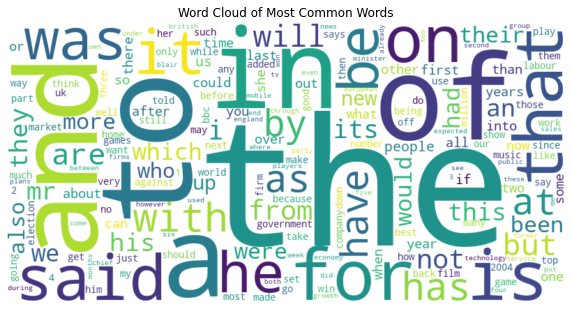

In [143]:
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

10-جداسازی دیتاهای test train

In [144]:
import pandas as pd

train_df = df.iloc[:2000]   # First 2000 rows for training
test_df = df.iloc[2000:2225]  # Remaining 225 rows for testing

train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

10-bag of words matrix

In [145]:
import pandas as pd
from collections import Counter

# Step 1: Read the CSV files
words_data = pd.read_csv('words.csv')

# Extract texts from train_data and words from words_data
texts = train_df['Text'].tolist()
words = words_data['Words'].tolist()

# Step 2: Initialize a list to store frequency dictionaries
word_frequencies = []

# Step 3: Count frequencies of each word in each text
for text in texts:
    word_counts = Counter(text.split())
    freq_dict = {word: word_counts.get(word, 0) for word in words}
    word_frequencies.append(freq_dict)

# Step 4: Convert the list of dictionaries to a DataFrame for easier analysis if needed
word_frequencies_df = pd.DataFrame(word_frequencies)

# Optionally, you can export the DataFrame to a CSV file
word_frequencies_df.to_csv('word_frequencies_train.csv', index=False)

# Print or use the DataFrame as needed
print(word_frequencies_df.head())



try:
    csv_file_path='word_frequencies_train.csv'
    df2 = pd.read_csv(csv_file_path)
    num_rows, num_cols = df2.shape
    
    # Print the number of rows and columns
    print(f"Number of rows in '{csv_file_path}': {num_rows}")
    print(f"Number of columns in '{csv_file_path}': {num_cols}")
    
except FileNotFoundError:
    print(f"File '{csv_file_path}' not found.")
except pd.errors.EmptyDataError:
    print(f"File '{csv_file_path}' is empty.")
except pd.errors.ParserError:
    print(f"Error parsing file '{csv_file_path}'. Check if it's a valid CSV file.")


   artist  chief  china  club  company  computer  country  deal  digital  \
0       0      0      0     0        0         0        0     0        0   
1       0      0      0     0        0         0        0     0        0   
2       0      0      0     0        0         0        0     0        0   
3       0      0      0     0        0         0        0     0        0   
4       0      0      0     0        0         0        0     0        0   

   director  ...  sale  service  tax  technology  time  uk  user  win  won  \
0         0  ...     0        0    0           0     0   0     0    0    0   
1         0  ...     0        0    0           0     0   0     0    5    0   
2         0  ...     0        1    0           0     0   0     0    0    0   
3         0  ...     0        0    0           0     0   1     0    0    0   
4         0  ...     0        0    0           0     4   0     0    0    0   

   work  
0     2  
1     0  
2     0  
3     0  
4     0  

[5 rows x 52 

11-standardization and SVD


In [146]:
import numpy as np
# Step 1: Standardize the matrix
mean = np.mean(word_frequencies_df, axis=0)
std_dev = np.std(word_frequencies_df, axis=0)
standardized_matrix = (word_frequencies_df - mean) / std_dev

# Step 2: Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(standardized_matrix, full_matrices=False)

# U: Left singular vectors (shape: (2000, 52))
# S: Singular values, sorted in descending order (shape: (52,))
# VT: Right singular vectors (shape: (52, 52))

# Print the shapes of U, S, and VT
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of VT:", VT.shape)


Shape of U: (2000, 52)
Shape of S: (52,)
Shape of VT: (52, 52)


12- thershold

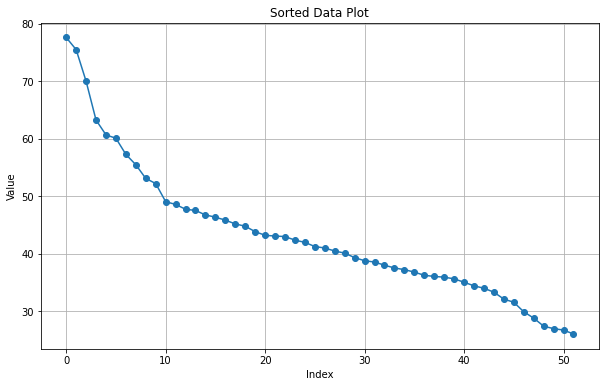

In [147]:
import matplotlib.pyplot as plt

# Generate x-axis values (indices after sorting)
x_values = np.arange(len(S))

# Plot the sorted data
plt.figure(figsize=(10, 6))
plt.plot(x_values, S, marker='o', linestyle='-')
plt.title('Sorted Data Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


12-Truncated SVD and reconstruction Error

In [148]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error


# Number of components (choose how many singular values/components to keep)
n_components = 10

# Step 1: Create TruncatedSVD object and fit-transform the matrix
svd = TruncatedSVD(n_components=n_components)
svd.fit(standardized_matrix)

# Step 2: Transform the matrix to reduced dimensionality
matrix_reduced = svd.transform(standardized_matrix)
vt_matrix_TruncatedSVD = svd.components_
singular_values_TruncatedSVD = svd.singular_values_
Sigma_matrix_TruncatedSVD = np.diag(singular_values_TruncatedSVD)
# Step 3: Reconstruct the matrix from reduced dimensions
matrix_reconstructed_TruncatedSVD = svd.inverse_transform(matrix_reduced)

# Step 4: Calculate reconstruction error (MSE)
reconstruction_error = mean_squared_error(standardized_matrix, matrix_reconstructed_TruncatedSVD)

# Print the shapes of transformed matrices and reconstruction error

print("Reconstruction error (MSE):", reconstruction_error)


Reconstruction error (MSE): 0.6173841140704955


13-Randomized SVD implementation

In [149]:
import numpy as np

def randomized_svd(A, k, n_iter=5, random_state=None):
    """
    Perform a randomized SVD on the matrix A.

    Parameters:
    A : array-like, shape (m, n)
        The input matrix.
    k : int
        Number of singular values and vectors to compute.
    n_iter : int, optional (default is 5)
        Number of iterations for the power method. Increasing this can improve accuracy.
    random_state : int or None, optional (default is None)
        Random seed for reproducibility.

    Returns:
    U : array-like, shape (m, k)
        Left singular vectors.
    Sigma : array-like, shape (k,)
        Singular values.
    Vt : array-like, shape (k, n)
        Right singular vectors.
    """

    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)

    # Step 1: Generate a random Gaussian matrix Omega
    m, n = A.shape
    Omega = rng.normal(size=(n, k))

    # Step 2: Form the sample matrix Y = A * Omega
    Y = A @ Omega

    # Step 3: Perform QR decomposition on Y
    Q, _ = np.linalg.qr(Y)

    # Step 4: Project the original matrix into the lower-dimensional subspace
    B = Q.T @ A

    # Step 5: Compute the SVD of the smaller matrix B
    Ub, Sigma, Vt = np.linalg.svd(B, full_matrices=False)

    # Step 6: Form the final matrices U, Sigma, and Vt
    U = Q @ Ub

    return U, Sigma, Vt


14- Randomized SVD for bag of words Matrix

In [150]:

# Perform randomized SVD
k = 10  # Number of singular values and vectors to compute
U, Sigma, Vt = randomized_svd(standardized_matrix, k, n_iter=5, random_state=42)



# If needed, reconstruct the original matrix
standardized_matrix_reconstructed_SVD = U @ np.diag(Sigma) @ Vt
reconstruction_error_randomSVD = mean_squared_error(standardized_matrix, standardized_matrix_reconstructed_SVD)
print("Reconstruction error for random SVD (MSE):", reconstruction_error_randomSVD)


Reconstruction error for random SVD (MSE): 0.7657032675117402


15- guess

Row 1:
Index: 30, Word: mobile, Value: 0.26664899840973405
Index: 45, Word: technology, Value: 0.2589740603173199
Index: 8, Word: digital, Value: 0.25687532268407803
Index: 39, Word: phone, Value: 0.22480163604625386
Index: 32, Word: music, Value: 0.19787915301513928



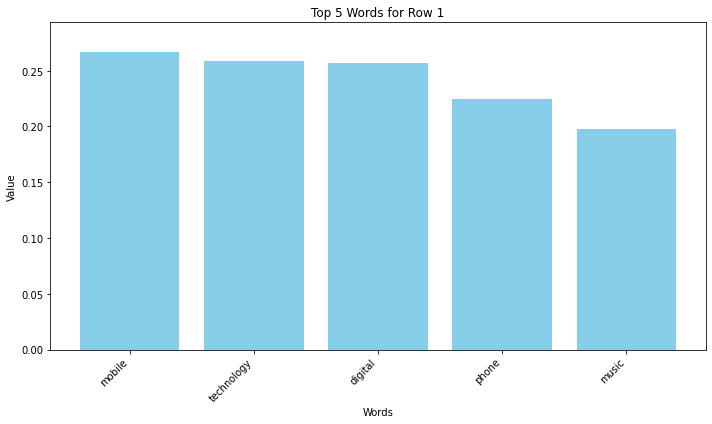

Row 2:
Index: 17, Word: government, Value: 0.28302743245917683
Index: 24, Word: labour, Value: 0.26177297585522236
Index: 11, Word: election, Value: 0.25463657306105736
Index: 6, Word: country, Value: 0.22677941525093295
Index: 38, Word: party, Value: 0.2159796087055506



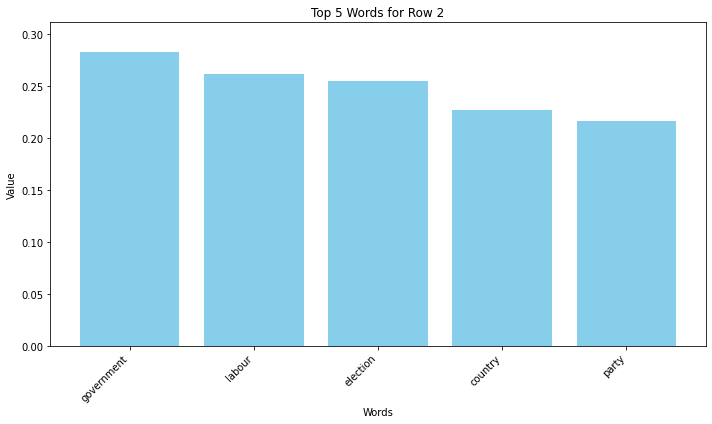

Row 3:
Index: 49, Word: win, Value: 0.3149324909614569
Index: 40, Word: play, Value: 0.3059288134041109
Index: 16, Word: game, Value: 0.2969910059191994
Index: 46, Word: time, Value: 0.2741504118155676
Index: 50, Word: won, Value: 0.24494369651357376



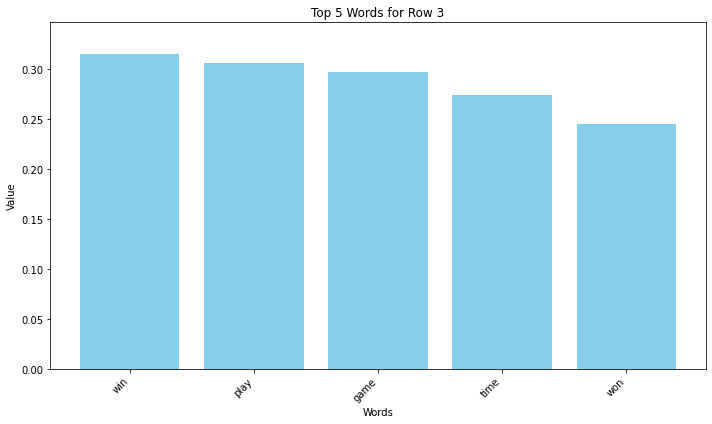

Row 4:
Index: 32, Word: music, Value: 0.37883321215671006
Index: 0, Word: artist, Value: 0.37678136420354663
Index: 50, Word: won, Value: 0.3482139949698104
Index: 41, Word: record, Value: 0.25205017283169157
Index: 13, Word: film, Value: 0.24955214722666724



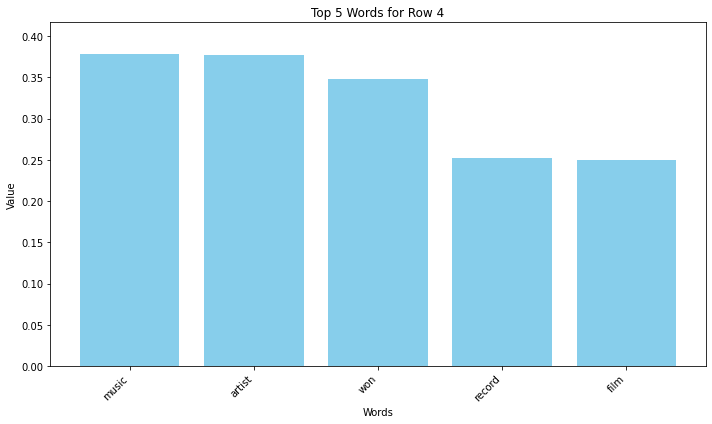

Row 5:
Index: 13, Word: film, Value: 0.27289208780426616
Index: 30, Word: mobile, Value: 0.22711611994370173
Index: 39, Word: phone, Value: 0.2230321581897202
Index: 9, Word: director, Value: 0.22207646561275
Index: 28, Word: million, Value: 0.19321115024478538



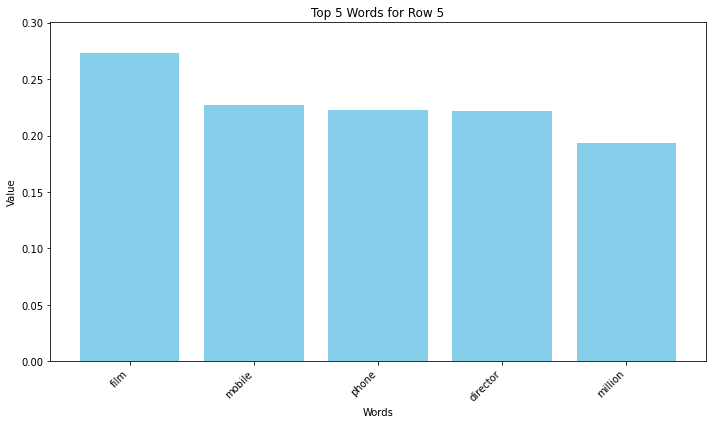

Row 6:
Index: 19, Word: growth, Value: 0.5239856111994264
Index: 10, Word: economy, Value: 0.4797804175823132
Index: 21, Word: high, Value: 0.22364977259659152
Index: 12, Word: expected, Value: 0.22032026515198935
Index: 16, Word: game, Value: 0.1913012568031806



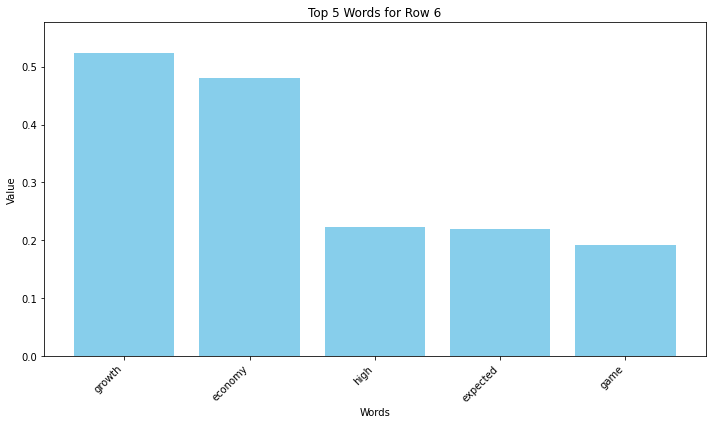

Row 7:
Index: 9, Word: director, Value: 0.3900390103968536
Index: 13, Word: film, Value: 0.35110038495756546
Index: 25, Word: law, Value: 0.2578335400391448
Index: 22, Word: home, Value: 0.2518657658585756
Index: 17, Word: government, Value: 0.232073465431841



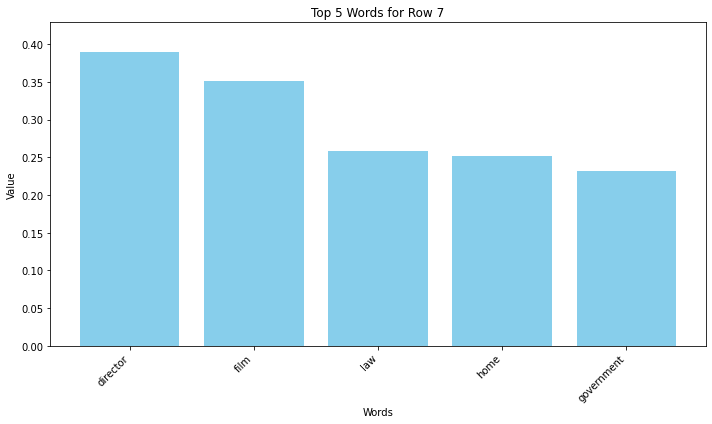

Row 8:
Index: 9, Word: director, Value: 0.35810292188864923
Index: 13, Word: film, Value: 0.28763033478675293
Index: 38, Word: party, Value: 0.24526548999808356
Index: 4, Word: company, Value: 0.2399702526560592
Index: 14, Word: firm, Value: 0.23820283052327515



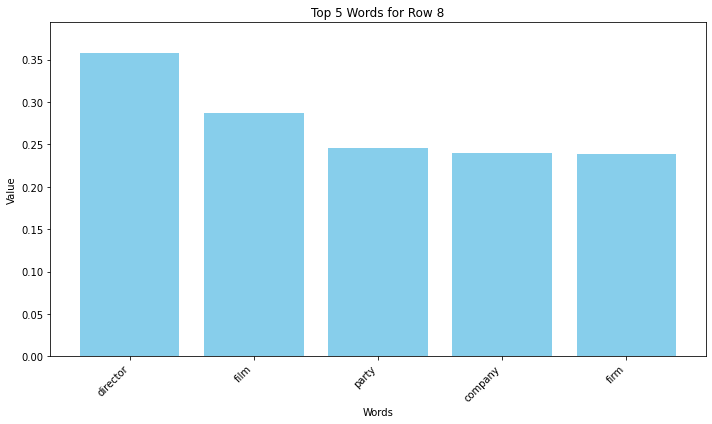

Row 9:
Index: 1, Word: chief, Value: 0.246220706819526
Index: 33, Word: new, Value: 0.2412047901061928
Index: 22, Word: home, Value: 0.2366173314210614
Index: 18, Word: group, Value: 0.23237609267340106
Index: 25, Word: law, Value: 0.2270487461470524



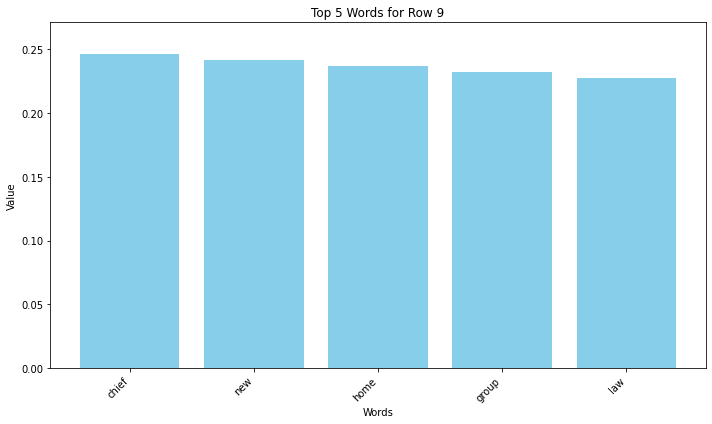

Row 10:
Index: 5, Word: computer, Value: 0.2706043535746614
Index: 37, Word: online, Value: 0.25703291483210405
Index: 4, Word: company, Value: 0.15978976821174382
Index: 48, Word: user, Value: 0.15396850841733756
Index: 18, Word: group, Value: 0.14070965924463244



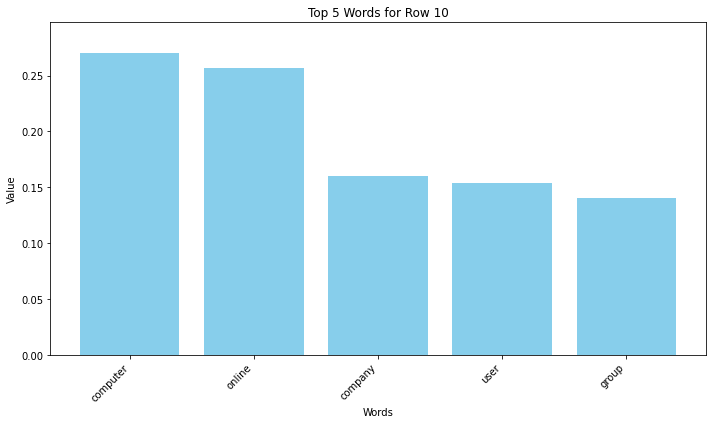

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load Words from Words.csv
# Ensure that 'Words.csv' has a column named 'Word' with 52 entries
words_df = pd.read_csv('words.csv')

# Assuming 'Words.csv' has a column named 'Words'
words = words_df['Words'].values

# Ensure the words array has exactly 52 words
if len(words) != 52:
    raise ValueError("The Words.csv file must have exactly 52 words")

# Iterate over each row of the matrix
for i, row in enumerate(vt_matrix_TruncatedSVD):
    # Find indices of the top 5 values in the row
    top_5_indices = np.argsort(row)[-5:][::-1]  # Get indices of the 5 largest values, sorted in descending order
    
    # Get the corresponding words and their values
    top_5_words = [words[idx] for idx in top_5_indices]
    top_5_values = [row[idx] for idx in top_5_indices]
    
    # Print the row index and the top 5 words and values
    print(f"Row {i+1}:")
    for idx, word in zip(top_5_indices, top_5_words):
        print(f"Index: {idx}, Word: {word}, Value: {row[idx]}")
    print()  # Print a newline for better readability
    
    # Plot the values of the 5 most frequent words across the rows
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_words, top_5_values, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Value')
    plt.title(f'Top 5 Words for Row {i+1}')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(top_5_values) * 1.1)  # Set y-axis limit to 10% higher than the max value
    plt.tight_layout()
    plt.show()


16- Euclidean Distance ﻭ Cosine Similarity 

In [152]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean


# Load Words from Words.csv
# Ensure that 'words.csv' has a column named 'Words' with 52 entries
words_df = pd.read_csv('words.csv')

# Assuming 'Words.csv' has a column named 'Words'
words = words_df['Words'].values

# Ensure the words array has exactly 52 words
if len(words) != 52:
    raise ValueError("The Words.csv file must have exactly 52 words")



In [153]:

# Define the two words to compare
word1 = 'mobile'  # Replace with your actual word
word2 = 'technology'  # Replace with your actual word

# Find indices of the two words
try:
    idx1 = np.where(words == word1)[0][0]
    idx2 = np.where(words == word2)[0][0]
except IndexError:
    raise ValueError("One or both of the words are not in the Words.csv file")

# Get the vector representations of the two words
vector1 = vt_matrix_TruncatedSVD[:, idx1]
vector2 = vt_matrix_TruncatedSVD[:, idx2]

# Compute cosine similarity
cos_sim = cosine_similarity([vector1], [vector2])[0][0]

# Compute Euclidean distance
euclidean_dist = euclidean(vector1, vector2)

# Print results

print(f"Cosine Similarity between '{word1}' and '{word2}':", cos_sim)
print(f"Euclidean Distance between '{word1}' and '{word2}':", euclidean_dist)

# Define the two words to compare
word1 = 'director'  # Replace with your actual word
word2 = 'film'  # Replace with your actual word

# Find indices of the two words
try:
    idx1 = np.where(words == word1)[0][0]
    idx2 = np.where(words == word2)[0][0]
except IndexError:
    raise ValueError("One or both of the words are not in the Words.csv file")

# Get the vector representations of the two words
vector1 = vt_matrix_TruncatedSVD[:, idx1]
vector2 = vt_matrix_TruncatedSVD[:, idx2]

# Compute cosine similarity
cos_sim = cosine_similarity([vector1], [vector2])[0][0]

# Compute Euclidean distance
euclidean_dist = euclidean(vector1, vector2)

# Print results

print(f"Cosine Similarity between '{word1}' and '{word2}':", cos_sim)
print(f"Euclidean Distance between '{word1}' and '{word2}':", euclidean_dist)

# Define the two words to compare
word1 = 'win'  # Replace with your actual word
word2 = 'won'  # Replace with your actual word

# Find indices of the two words
try:
    idx1 = np.where(words == word1)[0][0]
    idx2 = np.where(words == word2)[0][0]
except IndexError:
    raise ValueError("One or both of the words are not in the Words.csv file")

# Get the vector representations of the two words
vector1 = vt_matrix_TruncatedSVD[:, idx1]
vector2 = vt_matrix_TruncatedSVD[:, idx2]

# Compute cosine similarity
cos_sim = cosine_similarity([vector1], [vector2])[0][0]

# Compute Euclidean distance
euclidean_dist = euclidean(vector1, vector2)

# Print results

print(f"Cosine Similarity between '{word1}' and '{word2}':", cos_sim)
print(f"Euclidean Distance between '{word1}' and '{word2}':", euclidean_dist)

# Define the two words to compare
word1 = 'play'  # Replace with your actual word
word2 = 'game'  # Replace with your actual word

# Find indices of the two words
try:
    idx1 = np.where(words == word1)[0][0]
    idx2 = np.where(words == word2)[0][0]
except IndexError:
    raise ValueError("One or both of the words are not in the Words.csv file")

# Get the vector representations of the two words
vector1 = vt_matrix_TruncatedSVD[:, idx1]
vector2 = vt_matrix_TruncatedSVD[:, idx2]

# Compute cosine similarity
cos_sim = cosine_similarity([vector1], [vector2])[0][0]

# Compute Euclidean distance
euclidean_dist = euclidean(vector1, vector2)

# Print results

print(f"Cosine Similarity between '{word1}' and '{word2}':", cos_sim)
print(f"Euclidean Distance between '{word1}' and '{word2}':", euclidean_dist)

# Define the two words to compare
word1 = 'play'  # Replace with your actual word
word2 = 'law'  # Replace with your actual word

# Find indices of the two words
try:
    idx1 = np.where(words == word1)[0][0]
    idx2 = np.where(words == word2)[0][0]
except IndexError:
    raise ValueError("One or both of the words are not in the Words.csv file")

# Get the vector representations of the two words
vector1 = vt_matrix_TruncatedSVD[:, idx1]
vector2 = vt_matrix_TruncatedSVD[:, idx2]

# Compute cosine similarity
cos_sim = cosine_similarity([vector1], [vector2])[0][0]

# Compute Euclidean distance
euclidean_dist = euclidean(vector1, vector2)

# Print results

print(f"Cosine Similarity between '{word1}' and '{word2}':", cos_sim)
print(f"Euclidean Distance between '{word1}' and '{word2}':", euclidean_dist)


# Define the two words to compare
word1 = 'government'  # Replace with your actual word
word2 = 'music'  # Replace with your actual word

# Find indices of the two words
try:
    idx1 = np.where(words == word1)[0][0]
    idx2 = np.where(words == word2)[0][0]
except IndexError:
    raise ValueError("One or both of the words are not in the Words.csv file")

# Get the vector representations of the two words
vector1 = vt_matrix_TruncatedSVD[:, idx1]
vector2 = vt_matrix_TruncatedSVD[:, idx2]

# Compute cosine similarity
cos_sim = cosine_similarity([vector1], [vector2])[0][0]

# Compute Euclidean distance
euclidean_dist = euclidean(vector1, vector2)

# Print results

print(f"Cosine Similarity between '{word1}' and '{word2}':", cos_sim)
print(f"Euclidean Distance between '{word1}' and '{word2}':", euclidean_dist)



Cosine Similarity between 'mobile' and 'technology': 0.7870881950036357
Euclidean Distance between 'mobile' and 'technology': 0.35405971830872235
Cosine Similarity between 'director' and 'film': 0.9820716283801721
Euclidean Distance between 'director' and 'film': 0.12105679985834712
Cosine Similarity between 'win' and 'won': 0.7187417135712258
Euclidean Distance between 'win' and 'won': 0.3370921403784763
Cosine Similarity between 'play' and 'game': 0.9698667691467959
Euclidean Distance between 'play' and 'game': 0.12617071785214928
Cosine Similarity between 'play' and 'law': -0.29232834494189763
Euclidean Distance between 'play' and 'law': 0.7461294743280547
Cosine Similarity between 'government' and 'music': 0.04310371843982532
Euclidean Distance between 'government' and 'music': 0.7201929484418605


17-

In [171]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the datasets
words_df = pd.read_csv('words.csv')
train_dataset = pd.read_csv('train_dataset.csv')

# Access the 441st row (index 440)
row_441 = train_dataset.iloc[442]

# Extract the text for the 441st row and the words from the words.csv
text_441 = row_441['Text']  # Replace 'text_column' with the actual column name containing text
words_list = words_df['Words']  # Assuming the column with words is named 'Word'

# Add the text from the 441st row to the list of words for vectorization
corpus = [text_441] + words_list.tolist()

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

# The first vector corresponds to the 441st row text, the rest are for words
text_441_vector = tfidf_matrix[0]
words_vectors = tfidf_matrix[1:]

# Compute cosine similarity between the 441st row and each word
similarities = cosine_similarity(text_441_vector, words_vectors)

# Convert the similarities to a list
similarities = similarities.flatten()

# Add similarities to the DataFrame
words_df['Cosine_Similarity'] = similarities

# Print words and their cosine similarity with the 441st row
print(words_df[['Words', 'Cosine_Similarity']])


         Words  Cosine_Similarity
0       artist           0.000000
1        chief           0.000000
2        china           0.000000
3         club           0.000000
4      company           0.000000
5     computer           0.000000
6      country           0.000000
7         deal           0.019469
8      digital           0.000000
9     director           0.000000
10     economy           0.000000
11    election           0.000000
12    expected           0.000000
13        film           0.000000
14        firm           0.038938
15      france           0.000000
16        game           0.000000
17  government           0.000000
18       group           0.000000
19      growth           0.000000
20        help           0.000000
21        high           0.019469
22        home           0.000000
23    industry           0.000000
24      labour           0.000000
25         law           0.000000
26      market           0.000000
27       match           0.000000
28     million

In [173]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
train_dataset = pd.read_csv('train_dataset.csv')

# Access the 441st row (index 440)
row_441 = train_dataset.iloc[442]

# Extract the text for the 441st row
text_441 = row_441['text_column']  # Replace 'text_column' with the actual column name containing text

# Define preprocessing functions
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Preprocess the text
tokens_441 = preprocess_text(text_441)

# Count word frequencies
word_freq = Counter(tokens_441)

# Convert Counter object to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Optionally sort by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Save the DataFrame to a CSV file
word_freq_df.to_csv('word_frequencies.csv', index=False)

# Display the DataFrame
print(word_freq_df)


18-

19-

20-